# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


**Описание проекта**


Необходимо обработать данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах:

* выполнить предобработку данных,
* изучить данные, 
* найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

Следует учесть, что о каждой квартире в базе содержится два типа данных:

* добавленные пользователем (напрмер, площадь квартиры, её этаж, количество балконов),  
* картографические (например, расстояния до центра города, аэропорта, ближайшего парка). 


**Описание данных:**

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м).
* `balcony` — число балконов.
* `ceiling_height` — высота потолков (м).
* `cityCenters_nearest` — расстояние до центра города (м).
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия).
* `first_day_exposition` — дата публикации.
* `floor` — этаж.
* `floors_total` — всего этажей в доме.
* `is_apartment` — апартаменты (булев тип).
* `kitchen_area` — площадь кухни в квадратных метрах (м²).
* `last_price` — цена на момент снятия с публикации.
* `living_area` — жилая площадь в квадратных метрах (м²).
* `locality_name` — название населённого пункта.
* `open_plan` — свободная планировка (булев тип).
* `parks_around3000` — число парков в радиусе 3 км.
* `parks_nearest` — расстояние до ближайшего парка (м).
* `ponds_around3000` — число водоёмов в радиусе 3 км.
* `ponds_nearest` — расстояние до ближайшего водоёма (м).
* `rooms` — число комнат.
* `studio` — квартира-студия (булев тип).
* `total_area` — общая площадь квартиры в квадратных метрах (м²).
* `total_images` — число фотографий квартиры в объявлении.

## Откроем файл с данными и изучим общую информацию. 

In [696]:
! pip install missingno --user

In [697]:
# Импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as ny
import warnings
import missingno as msno

from IPython.display import display

# отключим предупреждения для удобства просмотра результатов
warnings.filterwarnings('ignore')

Загружаем данные из файла в датафрейм.

In [698]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

**Изучим общую информацию о полученном датафрейме:**

Выведем на экран первые 10 строк датафрейма:

In [699]:
 data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем общую информацию о датафрейме:

In [700]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Проверим сумму дубликатов:

In [701]:
data.duplicated().sum()

0

Проверим количество пропусков:

<AxesSubplot:>

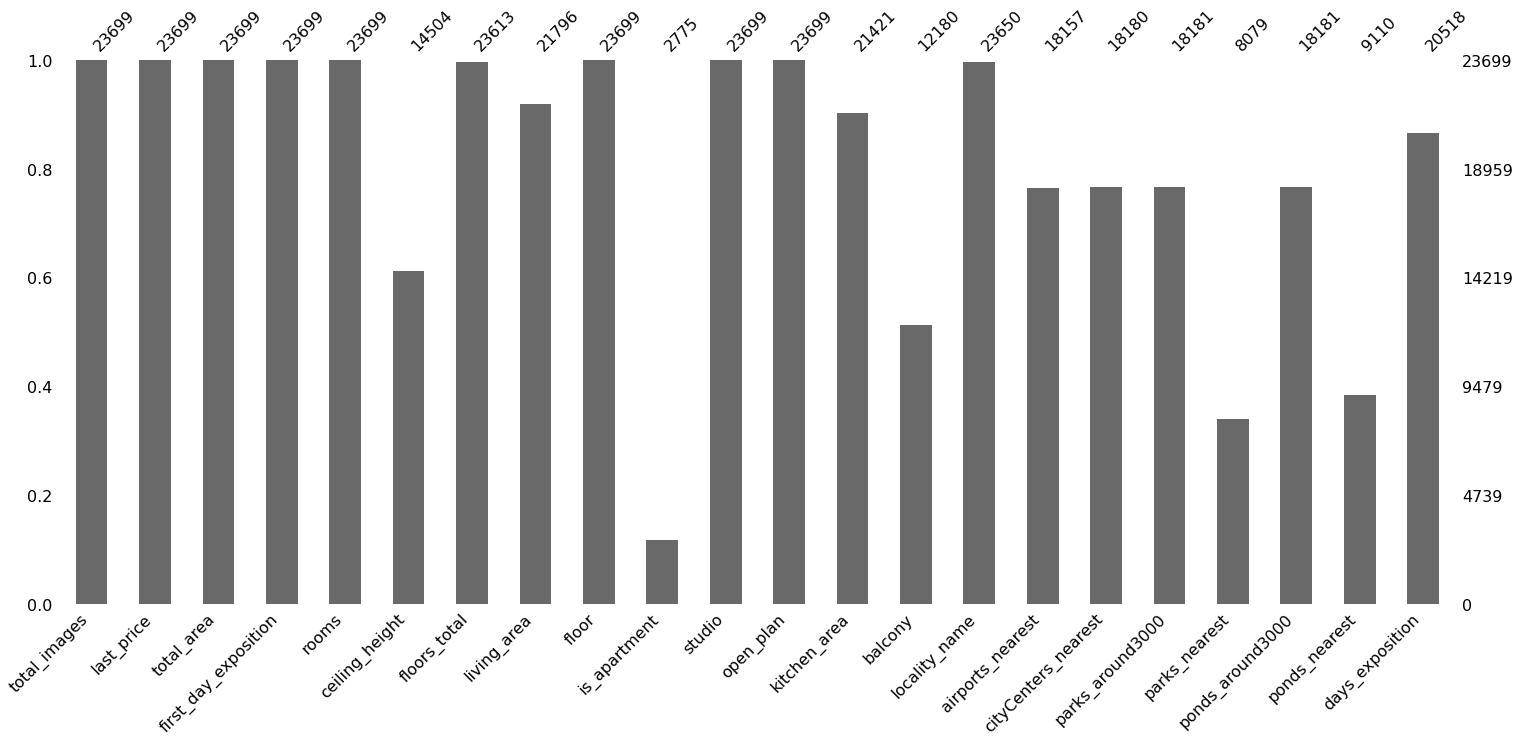

In [702]:
msno.bar(data)

Посмотрим оисание столбцов датафрейма:

In [703]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Построим общую гистограмму для всех числовых столбцов таблицы:

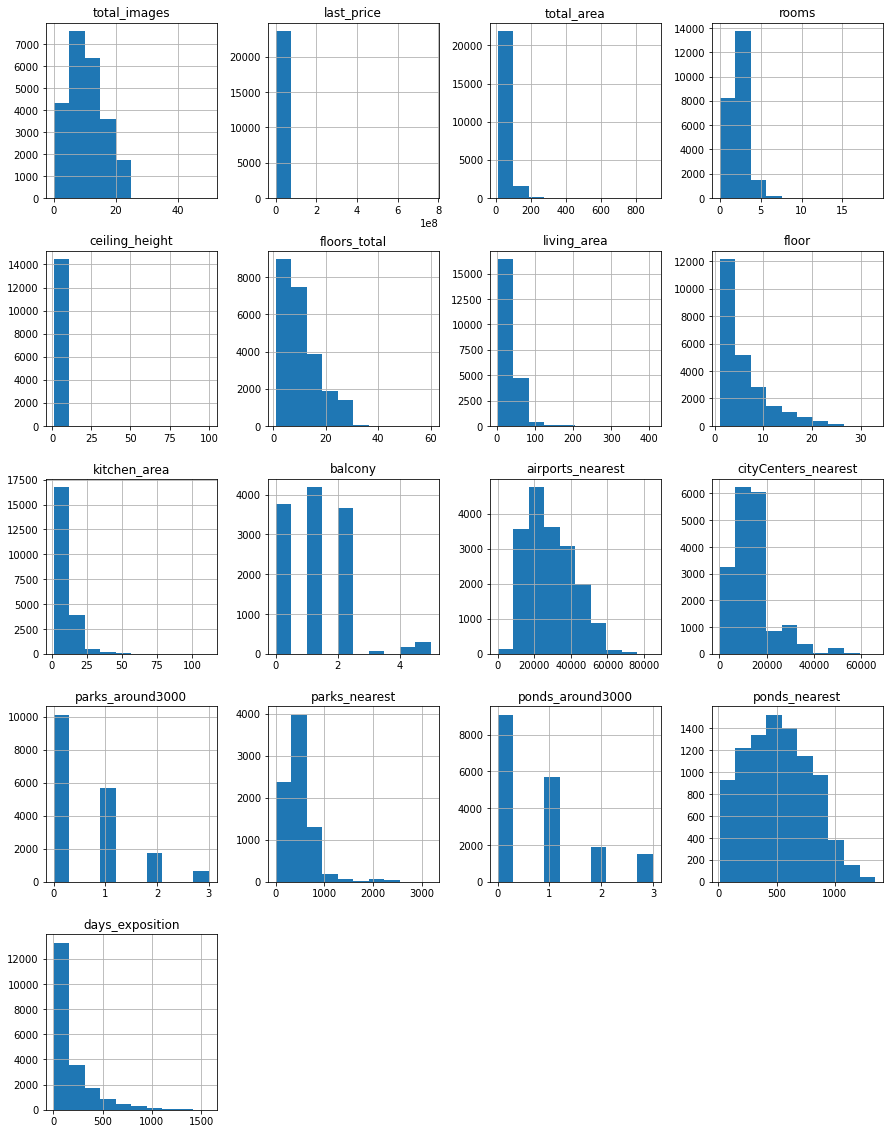

In [704]:
data.hist(figsize=(15, 20))
plt.show()

**Промежуточные выводы:**
* сохранили файл в датафрейм `data`,
* вывели на экран и изучили:
    - первые строки датафрейма, 
    - метод `info()`,
    - метод `describe()`,
    - дубли,
    - пропуски,
    - гистограммы.

По итогам изучения необходимо:
* изменить тип данных в столбцах:
    - `last_price` float64 в int32 (цена в рублях),
    - `first_day_exposition` object в datetime (дата),
    - `floors_total` float64 в int32 (число этажей),
    - `is_apartment object` в bool (булев тип),
    - `balcony` float64 в int32 (число балконов),
    - `parks_around3000` float64 в int32 (число парков),
    - `ponds_around3000` float64 в int32 (число водоемов),
    - `days_exposition` float64 в int32 (число дней).
* устранить пропуски:
    - `ceiling_height`,
    - `floors_total`,
    - `is_apartment`,
    - `living_area`,
    - `kitchen_area`,
    - `balcony`,
    - `locality_name`,
    - `airports_nearest`,
    - `cityCenters_nearest`,
    - `parks_around3000`,
    - `parks_nearest`,
    - `ponds_around3000`,
    - `ponds_nearest`,
    - `days_exposition`,
* скорректировать данные в столбцах:
    - `last_price` Min цена квартиры 12190 руб. - вероятно ошибочна, max цена 763 000 000 руб. возможна для элитной недвижимости большой площади. Надо проверить и удалить если ошибка.
    - `rooms` Min число комнат 0 - вероятно это студия или ошибка. Надо проверить и удалить если ошибка.
    - `ceiling_height` Min высота потолков 1 метр, max - 100 метров. Ошибка. Надо удалить.
    - `floors_total` Max количество этажей 60 - ошибка. Самое высокое здание в Санкт-Петербурге на текущий момент 36 этажей. Надо удалить.
    - `living_area` Min жилая площадь 2 м² - ошибка. Надо удалить.
    - `kitchen_area` Min площадь кухни 1,3 м² - ошибка, max - 112 м². Надо проверить и удалить если ошибка.
    - `airports_nearest` Min расстояние до аэропорта 0 м - ошибка или нет данных. Надо удалить.
    - `days_exposition` Min количество дней размещения объявления - 1, max - 1580 дней. Такие варианты возможны, но могут исказить среднее значение. Надо проверить и удалить.
* привести названия столбцов `cityCenters_nearest`, `studio`, `open_plan`, `parks_around3000`, `ponds_around3000` к регистру "snake_case".

## Предобработка данных

__Приведем названия столбцов к регистру "snake_case":__

In [705]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                            'studio': 'is_studio',
                            'open_plan': 'is_open_plan',
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})
# Проверка
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


__Обрабротаем пропущенные значения в столбцах.__

Посмотрим по столбцам количество и долю пропусков в процентах:

In [706]:
pd.DataFrame(data.isna().sum(), columns = ['missing_values']).join(pd.DataFrame(round(data.isna().sum() * 100 / data.shape[0], 2), columns = ['percents']))

,missing_values,percents
total_images,0,0.00
last_price,0,0.00
total_area,0,0.00
first_day_exposition,0,0.00
rooms,0,0.00
ceiling_height,9195,38.80
floors_total,86,0.36
living_area,1903,8.03
floor,0,0.00
is_apartment,20924,88.29


В 14 из 22 столбцов имеются пропуски:

* `ceiling_height` 9195 пропусков (38.8%). Высота потолоков может понадобиться в дальнейшем анализе. Целесообразно заполнить медианным значением. Для большей достоверности можно посчитать медиану по каждому населенному пункту.

* `floors_total` 86 пропусков (0,36%). Пропусков очень мало. Заполнить их нечем, так как этажность домов может сильно отличаться.

* `living_area` 1903 пропуска (8.03%). Вероятно, что пользователи не знают точную жилую площадь. Заполнить эти значения нечем.

* `is_apartment` 20924 пропусков (88.29%). Вероятно, что это обычные квартиры, а не аппартаменты. Пропуски можно заменить на False.

* `kitchen_area` 2278 пропусков (9.61%). Вероятно, что пользователи не знают точную площадь кухни. Заполнить эти значения нечем.

* `balcony` 11519 пропусков (48.61%). Вероятно, пользователи при отсутствии балконов их не указывают. В таком случае заменим пропуски нулями.

* `locality_name` 49 пропусков (0.21%). Пропусков очень мало. Заполнить эти значения нечем.

* `airports_nearest` 5542 пропусков (23.38%). Вероятно, что отсутствует необходимая картографическая информация. Заполнить эти значения нечем.

* `city_centers_nearest` 5519 пропусков (23.29%). Вероятно, что отсутствует необходимая картографическая информация. Целесообразно заполнить медианным значением по каждому населеннному пункту.

* `parks_around_3000` 5518 пропусков (23.28%). Совпадает с числом пропусков в `ponds_around_3000`. Вероятно, что отсутствует необходимая картографическая информация. Заполнить эти значения нечем.

* `parks_nearest` 15620 пропусков (65.91%). 2/3 объявлений не содержат информацию о ближайшем парке. Вероятно, что отсутствует необходимая картографическая информация. Заполнить эти значения нечем.

* `ponds_around_3000` 5518 пропусков (23.28%). Совпадает с числом пропусков в `parks_around_3000`. Вероятно, что отсутствует необходимая картографическая информация. Заполнить эти значения нечем.

* `ponds_nearest` 14589 пропусков (61.56%). Много объявлений не содержат информацию о ближайшем водоеме. Вероятно, что отсутствует необходимая картографическая информация. Заполнить эти значения нечем.

* `days_exposition` 3181 пропусков (13.42%). Вероятно эти данные должны были быть заполнены автоматически. Возможно, что произошел технический сбой при формировании выгрузки данных. Заполнить эти значения нечем.

Обработаем пропуски:

In [707]:
# Заполняем пропуски высоты потолков и удаленности от центра 
# медианными значениями по каждому населенному пункту:
for locality in data['locality_name'].unique():
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality), 'ceiling_height'] = data.loc[data['locality_name'] == locality, 'ceiling_height'].median()
    data.loc[(data['city_centers_nearest'].isna()) & (data['locality_name'] == locality), 'city_centers_nearest'] = data.loc[data['locality_name'] == locality, 'city_centers_nearest'].median()
    
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['city_centers_nearest'].isna(), 'city_centers_nearest'] = data['city_centers_nearest'].median()
    
# Заменяем пропуски is_appatment на False:
data['is_apartment'].fillna(False, inplace=True)

# Заменяем пропуски balcony на 0:
data['balcony'].fillna(0, inplace=True)

# Проверим результат:
pd.DataFrame(data.isna().sum(), columns = ['missing_values']).join(pd.DataFrame(round(data.isna().sum() * 100 / data.shape[0], 2), columns = ['percents']))

,missing_values,percents
total_images,0,0.00
last_price,0,0.00
total_area,0,0.00
first_day_exposition,0,0.00
rooms,0,0.00
ceiling_height,0,0.00
floors_total,86,0.36
living_area,1903,8.03
floor,0,0.00
is_apartment,0,0.00


__Рассмотрим типы данных в каждом столбце:__

Ранее мы определили столбцы, в которых нужно преобразовать один тип данных в другой. 

* `last_price` float64 в int32 (цена в рублях),
* `first_day_exposition` object в datetime (дата),
* `floors_total` float64 в int32 (число этажей),
* `is_apartment object` в bool (булев тип),
* `balcony` float64 в int32 (число балконов),
* `parks_around3000` float64 в int32 (число парков),
* `ponds_around3000` float64 в int32 (число водоемов),
* `days_exposition` float64 в int32 (число дней).

В столбцах `floors_total`, `parks_around3000`, `ponds_around3000`, `days_exposition` не удалось убрать пропуски, поэтому не сможем преобразовать их в другой тип.

In [708]:
# Преобразуем столбцы с float64 в int32:
# список с именами столбцов для преобразования
columns = ['last_price', 
           'total_images',
           'rooms',
           'balcony']
# изменяем тип данных
data[columns] = data[columns].apply(lambda x: x.astype('int32'))
# проверяем результат
data[columns].dtypes

last_price      int32
total_images    int32
rooms           int32
balcony         int32
dtype: object

In [709]:
# преобразуем first_day_exposition к типу datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# проверяем результат
data['first_day_exposition'].dtypes

dtype('<M8[ns]')

In [710]:
# преобразуем is_apartment к булевому типу
data['is_apartment'] = data['is_apartment'].astype('bool')
# проверяем результат
data['is_apartment'].dtypes

dtype('bool')

In [711]:
# проверяем все столбцы
data.dtypes

total_images                     int32
last_price                       int32
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int32
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
is_studio                         bool
is_open_plan                      bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

__Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.__

Напомним, что этапе изучения данных мы не обнаружили явные дубликаты. 

Выявим и обработаем неявные дубликаты в столбце с названиями населенных пунктов.

In [712]:
# выведем уникальные значения locality_name
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [713]:
# сохраним в переменную и выведем первоначальное количество уникальных значений locality_name
start_locality_name = len(data['locality_name'].sort_values().unique())
start_locality_name

365

Дубли возникают из-за буквы 'е' в слове 'посёлок'. Проведем замену.

In [714]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
# проверим результат
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Большая Ижора', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской посёлок Советский', 'городской посёлок Фёд

Проверим прочие совпадения наименований:

In [715]:
# добавим столбец с коротким наименованием населенного пункта:
data['locality_short_name'] = data['locality_name'].apply(lambda x: str(x).split()[-1])
# выберем те короткие наименования, у которых > 1 полного наименования и выведем на экран
for locality in data['locality_short_name'].unique():
    df = data.loc[data['locality_short_name'] == locality, 'locality_name'].unique()
    if len(df) > 1:
        display(df)

array(['посёлок Мурино', 'Мурино'], dtype=object)

array(['деревня Кудрово', 'Кудрово'], dtype=object)

array(['посёлок городского типа Красный Бор', 'Сосновый Бор',
       'деревня Чудской Бор', 'деревня Бор', 'деревня Трубников Бор',
       'посёлок Пансионат Зелёный Бор'], dtype=object)

array(['деревня Фёдоровское', 'городской посёлок Фёдоровское'],
      dtype=object)

array(['садовое товарищество Новая Ропша', 'посёлок Ропша'], dtype=object)

array(['Никольское', 'село Никольское'], dtype=object)

array(['посёлок Романовка', 'деревня Малая Романовка'], dtype=object)

array(['посёлок городского типа Рощино', 'городской посёлок Рощино'],
      dtype=object)

array(['село Павлово', 'городской посёлок Павлово',
       'посёлок городского типа Павлово'], dtype=object)

array(['посёлок городского типа Советский', 'городской посёлок Советский'],
      dtype=object)

array(['городской посёлок Большая Ижора',
       'посёлок городского типа Большая Ижора'], dtype=object)

array(['городской посёлок Лесогорский',
       'посёлок городского типа Лесогорский'], dtype=object)

array(['посёлок городского типа Рахья', 'садовое товарищество Рахья'],
      dtype=object)

array(['деревня Большие Колпаны', 'деревня Малые Колпаны'], dtype=object)

array(['Новая Ладога', 'село Старая Ладога'], dtype=object)

array(['посёлок Зимитицы', 'деревня Зимитицы'], dtype=object)

array(['посёлок Рябово', 'посёлок городского типа Рябово'], dtype=object)

array(['деревня Бегуницы', 'деревня Старые Бегуницы'], dtype=object)

array(['городской посёлок Мга', 'посёлок городского типа Мга'],
      dtype=object)

array(['посёлок станции Вещево',
       'посёлок при железнодорожной станции Вещево'], dtype=object)

array(['деревня Калитино', 'посёлок Калитино'], dtype=object)

array(['посёлок городского типа Приладожский',
       'садовое товарищество Приладожский'], dtype=object)

array(['посёлок Щеглово', 'деревня Щеглово'], dtype=object)

array(['деревня Рабитицы', 'посёлок Рабитицы'], dtype=object)

array(['городской посёлок Назия', 'посёлок городского типа Назия'],
      dtype=object)

array(['деревня Гарболово', 'посёлок Гарболово'], dtype=object)

array(['посёлок станции Приветнинское',
       'посёлок при железнодорожной станции Приветнинское'], dtype=object)

array(['Любань', 'посёлок Любань'], dtype=object)

array(['посёлок городского типа Дружная Горка',
       'посёлок Форт Красная Горка'], dtype=object)

array(['посёлок станции Громово', 'посёлок Громово'], dtype=object)

array(['посёлок Лесное', 'коттеджный посёлок Лесное'], dtype=object)

Выберем и переименуем близкие наименования:

In [716]:
# Через replace приведем к одному значению
data = data.replace(
    {'locality_name':{'Мурино': 'посёлок Мурино',
                      'Кудрово': 'деревня Кудрово',
                      'Никольское': 'село Никольское',
                      'городской посёлок Рощино': 'посёлок городского типа Рощино',
                      'городской посёлок Павлово': 'посёлок городского типа Павлово', 
                      'городской посёлок Советский': 'посёлок городского типа Советский', 
                      'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 
                      'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский', 
                      'посёлок Рябово': 'посёлок городского типа Рябово', 
                      'городской посёлок Мга': 'посёлок городского типа Мга', 
                      'посёлок станции Вещево': 'посёлок при железнодорожной станции Вещево',
                      'городской посёлок Назия': 'посёлок городского типа Назия', 
                      'посёлок станции Приветнинское': 'посёлок при железнодорожной станции Приветнинское',
                      'Любань': 'посёлок Любань',
                      'посёлок Громово': 'посёлок станции Громово',
                      'посёлок Лесное': 'коттеджный посёлок Лесное', 
                     }})
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Лодейное Поле', 'Ломоносов', 'Луга',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Новоселье', 'городской посёлок Свирьстрой',
       'городской посёлок Фёдоровское', 'городской посёлок Янино-1',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня 

In [717]:
# Удалим пустые строки в названиях населенных пунктов так как они не имеют смысла для анализа
data = data.dropna(subset=['locality_name'])
# проверим результат
data['locality_name'].isna().sum()

0

In [718]:
# Покажем сколько неявных дублей убрали
start_locality_name - len(data['locality_name'].sort_values().unique())

51

__Найдем и устраним редкие и выбивающиеся значения.__

Проверим данные в столбцах:
* `last_price` Min цена квартиры 12190 руб. - вероятно ошибочна, max цена 763 000 000 руб. возможна для элитной недвижимости большой площади. 
* `rooms` Min число комнат 0 - вероятно это студия или ошибка. Надо проверить и удалить если ошибка.
* `ceiling_height` Min высота потолков 1 метр, max - 100 метров. 
* `floors_total` Max количество этажей 60 - ошибка. 
* `living_area` Min жилая площадь 2 м² - ошибка.
* `kitchen_area` Min площадь кухни 1,3 м² - ошибка, max - 112 м². 
* `airports_nearest` Min расстояние до аэропорта 0 м - ошибка или нет данных.
* `days_exposition` Min количество дней размещения объявления - 1, max - 1580 дней. 

In [719]:
# сохраним в переменную и выведем текущее количество строк датафрейма
start_data_len = data.shape[0]
start_data_len

23650

Посмотрим графики стоимости квартир.

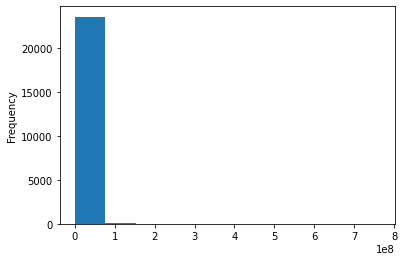

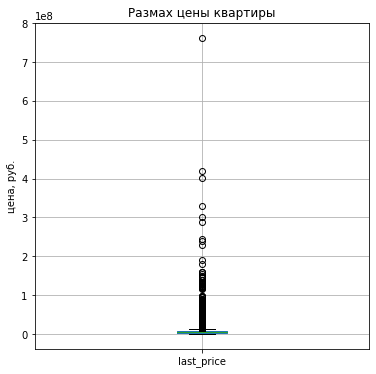

In [720]:
# посмотрим график для наглядности
data['last_price'].sort_values().plot(y = 'last_price', kind = 'hist', bins = 10)
plt.show()

# построим диаграмму размаха высоты потолков
data.boxplot(column='last_price', figsize=(6, 6))
plt.title('Размах цены квартиры')
# plt.ylim(1, 6)
plt.ylabel('цена, руб.')
plt.show()

Выбросы свыше 200 млн. руб. и близкие к нулю.

Посмотрим распределение стоимости :

In [721]:
data.query('last_price < 100000 or last_price > 200000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_short_name
1436,19,330000000,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,...,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,Санкт-Петербург
5893,3,230000000,500.0,2017-05-31,6,2.70,7.0,NaN,7,False,...,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0,Санкт-Петербург
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,...,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,Санкт-Петербург
12971,19,763000000,400.0,2017-09-30,7,2.70,10.0,250.0,10,False,...,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,Санкт-Петербург
13749,7,240000000,410.0,2017-04-01,6,3.40,7.0,218.0,7,False,...,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0,Санкт-Петербург
14706,15,401300000,401.0,2016-02-20,5,2.70,9.0,204.0,9,False,...,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0,Санкт-Петербург
15651,20,300000000,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,...,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0,Санкт-Петербург
16461,17,245000000,285.7,2017-04-10,6,3.35,7.0,182.8,4,False,...,0,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0,Санкт-Петербург
19540,8,420000000,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,Санкт-Петербург
22831,18,289238400,187.5,2019-03-19,2,3.37,6.0,63.7,6,False,...,0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN,Санкт-Петербург


Дорогие квартиры имеют большую площадь. Такие варианты возможны. Квартира за 12190 руб. явная ошибка. Удалим.

In [722]:
data = data.query('last_price > 12190')

In [723]:
### после удаления осталось строк:
print(f'После удаления осталось {data.shape[0]} строк ({round(100 * data.shape[0] / start_data_len, 3)}%)')

После удаления осталось 23649 строк (99.996%)


Проверим количество комнат.

In [724]:
len(data.query('rooms < 1 and not is_studio'))

59

Квартиры с 0 комнат и не являющиеся студией удалим.

In [725]:
data = data.query('rooms > 0 or is_studio')

In [726]:
### после удаления осталось строк:
print(f'После удаления осталось {data.shape[0]} строк ({round(100 * data.shape[0] / start_data_len, 3)}%)')

После удаления осталось 23590 строк (99.746%)


Рассмотрим высоту потолков.

Если высота потолка > 20 метров, то можно предположить, что это ошибка и нужно поделить такие значения на 10.

In [727]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height']

355       25.0
2158      27.0
3148      32.0
4643      25.0
5076      24.0
5246      27.0
5669      26.0
5807      27.0
6246      25.0
9379      25.0
10773     27.0
11285     25.0
14382     25.0
17496     20.0
17857     27.0
18545     25.0
20478     27.0
20507     22.6
21377     27.5
21824     27.0
22336     32.0
22869    100.0
22938     27.0
Name: ceiling_height, dtype: float64

In [728]:
# Для значений больше 20 применим деление на 10
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10
# проверим результат
data['ceiling_height'].describe()

count    23590.000000
mean         2.707025
std          0.286427
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

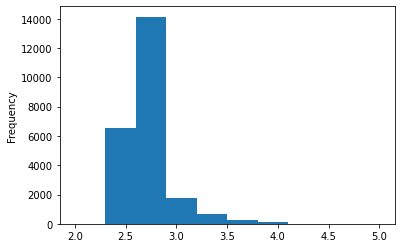

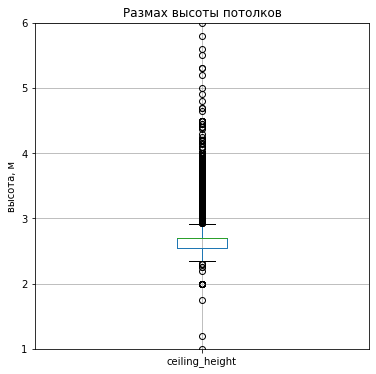

In [729]:
# посмотрим график для наглядности
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 10, range=(2,5))
plt.show()

# построим диаграмму размаха высоты потолков
data.boxplot(column='ceiling_height', figsize=(6, 6))
plt.title('Размах высоты потолков')
plt.ylim(1, 6)
plt.ylabel('высота, м')
plt.show()

Из графика видно, что значения менее 2,5 и более 2,8 метров - аномалии.

In [730]:
# Оставим объекты с высотой потолков от 2 до 5 метров
data = data.query('2 <= ceiling_height <= 5')

In [731]:
### после удаления осталось строк:
print(f'После удаления осталось {data.shape[0]} строк ({round(100 * data.shape[0] / start_data_len, 3)}%)')

После удаления осталось 23570 строк (99.662%)


Посмотрим количество этажей. Удалим строки с количество этажей больше 30

In [732]:
data.query('floors_total >= 30')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_short_name
397,15,5990000,54.0,2018-03-22,2,2.70,36.0,21.4,28,False,...,1,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0,Санкт-Петербург
871,14,7777777,75.0,2017-11-16,2,2.70,35.0,40.5,23,False,...,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,169.0,Санкт-Петербург
1060,10,5200000,50.0,2015-11-06,2,2.70,35.0,39.0,15,False,...,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0,Санкт-Петербург
1697,11,3550000,28.0,2018-02-08,1,2.65,34.0,18.0,23,False,...,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,410.0,Санкт-Петербург
1917,13,10150000,74.0,2017-11-17,2,2.80,35.0,34.4,30,False,...,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN,Санкт-Петербург
2253,12,3800000,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,...,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,Кронштадт
2966,9,4300000,37.0,2017-08-08,1,2.70,35.0,14.0,15,False,...,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,50.0,Санкт-Петербург
4855,12,5500000,50.0,2017-06-22,1,2.80,35.0,22.0,4,False,...,0,Санкт-Петербург,18627.0,20339.0,1.0,609.0,3.0,145.0,537.0,Санкт-Петербург
5807,17,8150000,80.0,2019-01-09,2,2.70,36.0,41.0,13,False,...,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,Санкт-Петербург
5808,12,4590000,43.0,2018-10-19,1,2.70,35.0,14.0,11,False,...,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,82.0,Санкт-Петербург


In [733]:
# Оставим строки с этажами <= 30
data = data.query('floors_total <= 30 or floors_total.isna()')
data['floors_total'].max()

29.0

In [734]:
### после удаления осталось строк:
print(f'После удаления осталось {data.shape[0]} строк ({round(100 * data.shape[0] / start_data_len, 3)}%)')

После удаления осталось 23540 строк (99.535%)


Проверим жилую площадь < 5 метров.

In [735]:
data.query('living_area < 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_short_name
3242,7,4440000,41.0,2017-07-02,1,2.7,17.0,3.0,17,False,...,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0,Санкт-Петербург
13915,20,6350000,52.0,2018-02-06,2,3.0,6.0,2.0,2,False,...,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0,Санкт-Петербург
21758,0,2330000,23.0,2018-01-01,0,2.7,24.0,2.0,22,False,...,0,посёлок Мурино,NaN,13101.0,NaN,NaN,NaN,NaN,66.0,Мурино
23574,14,64990000,139.0,2015-11-24,3,3.0,8.0,3.0,8,False,...,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0,Санкт-Петербург


В нескольких обектах очень малая жилая площадь, но в то же время в столбце много пропусков, которые мы не смогли убрать. Оставим как есть.

Аналогично поступим и с площадью кухни.

Проверим расстояние от аэропорта

In [736]:
data.query('airports_nearest < 1000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_short_name
21085,0,7000000,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,...,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,Санкт-Петербург


Явная ошибка. Удалим

In [737]:
data = data.query('airports_nearest != 0')

In [738]:
### после удаления осталось строк:
print(f'После удаления осталось {data.shape[0]} строк ({round(100 * data.shape[0] / start_data_len, 3)}%)')

После удаления осталось 23539 строк (99.531%)


Проверим количество дней размещения:

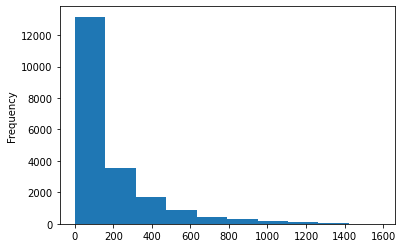

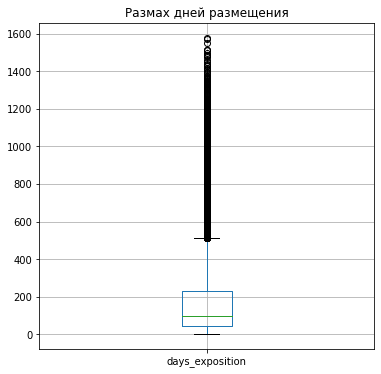

In [739]:
# data.query('days_exposition > 1100') 

# посмотрим график для наглядности
data['days_exposition'].sort_values().plot(y = 'days_exposition', kind = 'hist', bins = 10)
plt.show()

# построим диаграмму размаха
data.boxplot(column='days_exposition', figsize=(6, 6))
plt.title('Размах дней размещения')
plt.show()

Есть большое количество объявлений с длительными сроками размещения. Оставим как есть.

**Промежуточные выводы:**

* приведены к регистру "snake_case" названия столбцов `cityCenters_nearest`, `studio`, `open_plan`, `parks_around3000`, `ponds_around3000`, 
* определены пропущенные значения,
* даны пояснения, какие пропущенные значения обнаружены,
* заполнены пропущенные значения `ceiling_height`, `is_apartment`, `balcony`, `city_сenters_nearest`,
* изменены типы данных `last_price`, `first_day_exposition`, `is_apartment object`, `balcony`,
* дано пояснение, в каких столбцах изменены типы и почему,
* устранены неявные дубликаты в названиях населённых пунктов,
* устранены редкие и выбивающиеся значения (аномалии) в столбцах `last_price`, `rooms`, `ceiling_height`, `floors_total`, `airports_nearest`.

In [740]:
### после удаления осталось строк:
print(f'После всех удалений осталось {data.shape[0]} строк ({round(100 * data.shape[0] / start_data_len, 3)}%)')

После всех удалений осталось 23539 строк (99.531%)


## Посчитаем и добавим в таблицу новые столбцы

Цена одного квадратного метра:

In [741]:
# Добавим столбец с ценой за 1 м² округленной до рублей.
data['one_meter_price'] = round(data['last_price'] / data['total_area'])

# Проверим результат
data[['total_area', 'last_price', 'one_meter_price']].head()

,total_area,last_price,one_meter_price
0,108.0,13000000,120370.0
1,40.4,3350000,82921.0
2,56.0,5196000,92786.0
3,159.0,64900000,408176.0
4,100.0,10000000,100000.0


День недели публикации объявления (0 — понедельник, 1 — вторник и так далее):

In [742]:
# Добавим столбец с днем недели публикации объявления
data['week_day_exposition'] = data['first_day_exposition'].dt.weekday

Месяц публикации объявления:

In [743]:
# Добавим столбец с месяцем публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

Год публикации объявления:

In [744]:
# Добавим столбец с годом публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

# Проверим результат
data[['first_day_exposition', 'week_day_exposition', 'month_exposition', 'year_exposition']].head()

,first_day_exposition,week_day_exposition,month_exposition,year_exposition
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


Тип этажа квартиры (значения — «первый», «последний», «другой»):

In [745]:
# Функция для категоризации этажности в доме
def categorize_floor(row):
    try:
        floor = row['floor']
        floors_total = row['floors_total']
        if floor == 1:
            return 'первый'
        elif floors_total and floor == floors_total:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'неизвестно'

In [746]:
# Добавляем столбец с категорией этажа квартиры
data['floor_category'] = data.apply(categorize_floor, axis=1)

# Проверим результат
data[['floors_total', 'floor', 'floor_category']].head()

,floors_total,floor,floor_category
0,16.0,8,другой
1,11.0,1,первый
2,5.0,4,другой
3,14.0,9,другой
4,14.0,13,другой


Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений):

In [747]:
# Добавляем столбец с расстоянием до центра города в км
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

# Проверим результат
data[['city_centers_nearest', 'city_centers_nearest_km']].head()

,city_centers_nearest,city_centers_nearest_km
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
3,6800.0,7.0
4,8098.0,8.0


**Промежуточные выводы:**

* посчитано и добавлено в таблицу: цена одного квадратного метра,
* посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.),
* посчитано и добавлено в таблицу: месяц публикации объявления,
* посчитано и добавлено в таблицу: год публикации объявления,
* посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»),
* посчитано и добавлено в таблицу: расстояние в км до центра города.

## Проведем исследовательский анализ данных

__*1.	Изучим следующие параметры объектов:*__

Общая площадь:

In [748]:
data['total_area'].describe()

count    23539.000000
mean        60.360128
std         35.489239
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

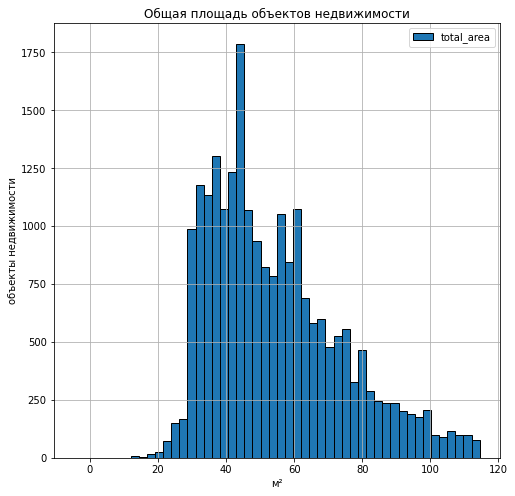

In [749]:
# Для того, чтобы построить гистограмму без выбросов 
# рассчитаем первый квартиль Q1, третий квартиль Q3 и межквартильный размах IQR. 
q1 = data['total_area'].quantile(.25)
q3 = data['total_area'].quantile(.75)
iqr = q3 - q1

# Построим гистограмму
data['total_area'].hist(bins=50, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), ec='black', figsize=(8, 8), legend=True)
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Без выбросов диапазон до 120 м². Большая часть объектов недвижимости имеет площадь от 30 до 70 м². Наиболее распространенные варианты 40-45 м². Площадь объектов более 100 м² и менее 30 м² встречается редко. Среднее значение 63 м², медиана 54 м².

Жилая площадь:

In [750]:
data['living_area'].describe()

count    21647.000000
mean        34.478830
std         22.010031
min          2.000000
25%         18.600000
50%         30.000000
75%         42.400000
max        409.700000
Name: living_area, dtype: float64

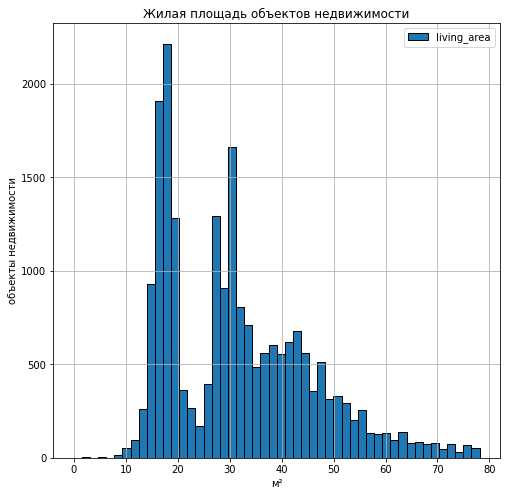

In [751]:
# Для того, чтобы построить гистограмму без выбросов 
# рассчитаем первый квартиль Q1, третий квартиль Q3 и межквартильный размах IQR. 
q1 = data['living_area'].quantile(.25)
q3 = data['living_area'].quantile(.75)
iqr = q3 - q1

# Построим гистограмму
data['living_area'].hist(bins=50, range=(0, (q3 + 1.5 * iqr)), ec='black', figsize=(8, 8), legend=True)
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Без выбросов диапазон до 80 м². Большая часть объектов недвижимости имеет жилую площадь от 15 до 42 м². Наиболее распространенный вариант 18 м². Жилая площадь объектов более 60 м² и менее 15 м² встречается редко. Среднее значение 36 м², медиана 31 м².

Площадь кухни:

In [752]:
data['kitchen_area'].describe()

count    21336.000000
mean        10.556080
std          5.885572
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

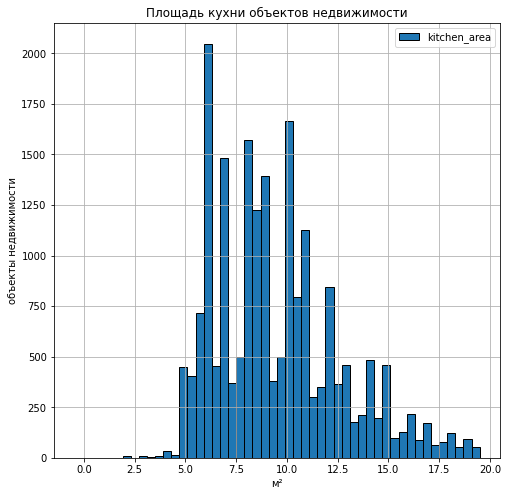

In [753]:
# Для того, чтобы построить гистограмму без выбросов 
# рассчитаем первый квартиль Q1, третий квартиль Q3 и межквартильный размах IQR. 
q1 = data['kitchen_area'].quantile(.25)
q3 = data['kitchen_area'].quantile(.75)
iqr = q3 - q1

# Построим гистограмму
data['kitchen_area'].hist(bins=50, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), ec='black', figsize=(8, 8), legend=True)
plt.title('Площадь кухни объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Без выбросов диапазон до 20 м². Большая часть объектов недвижимости имеет площадь кухни от 6 до 12 м². Наиболее распространенный вариант около 6 м². Кухни более 12 м² и менее 5.5 м² встречается редко. Среднее значение 10.9 м², медиана 9.7 м².

Цена объекта:

In [754]:
data['last_price'].describe()

count    2.353900e+04
mean     6.531428e+06
std      1.082926e+07
min      4.300000e+05
25%      3.430000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

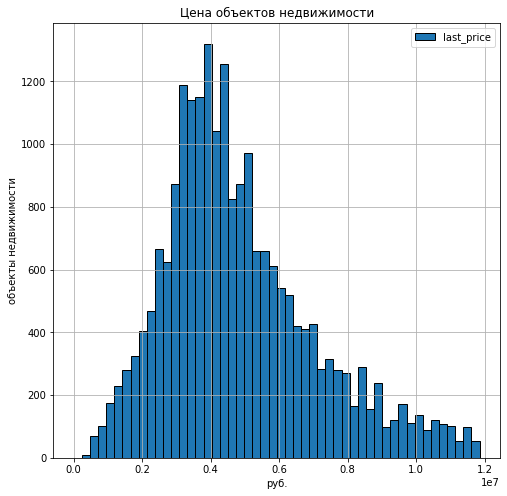

In [755]:
# Для того, чтобы построить гистограмму без выбросов 
# рассчитаем первый квартиль Q1, третий квартиль Q3 и межквартильный размах IQR. 
q1 = data['last_price'].quantile(.25)
q3 = data['last_price'].quantile(.75)
iqr = q3 - q1

# Построим гистограмму
data['last_price'].hist(bins=50, range=(0, (q3 + 1.5 * iqr)), ec='black', figsize=(8, 8), legend=True)
plt.title('Цена объектов недвижимости')
plt.xlabel('руб.')
plt.ylabel('объекты недвижимости')
plt.show()

Без выбросов диапазон до 13.5 млн. руб. Большая часть объектов недвижимости имеет цену от 3 до 6 млн. руб. Наиболее распространенный вариант около 4.2 млн. руб. Цены более 9 млн. руб и менее 2.5 млн. руб. встречается редко. Среднее значение 7.5 млн. руб, медиана 5.25 млн. руб.

Количество комнат:

In [756]:
data['rooms'].describe()

count    23539.000000
mean         2.075449
std          1.074781
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

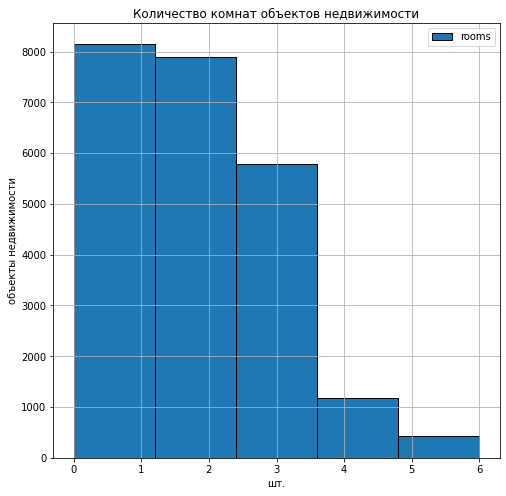

In [757]:
# Для того, чтобы построить гистограмму без выбросов 
# рассчитаем первый квартиль Q1, третий квартиль Q3 и межквартильный размах IQR. 
q1 = data['rooms'].quantile(.25)
q3 = data['rooms'].quantile(.75)
iqr = q3 - q1

# Построим гистограмму
data['rooms'].hist(bins=5, range=(0, (q3 + 1.5 * iqr)), ec='black', figsize=(8, 8), legend=True)
plt.title('Количество комнат объектов недвижимости')
plt.xlabel('шт.')
plt.ylabel('объекты недвижимости')
plt.show()

Без выбросов диапазон до 6 комнат. Большая часть объектов недвижимости имеет 1 или 2 комнаты. Наиболее распространенный вариант 1-2 комнаты. Более 3 комнат встречается редко. Среднее значение 2 и медиана 2.

Высота потолков:

In [758]:
data['ceiling_height'].describe()

count    23539.000000
mean         2.702926
std          0.220672
min          2.000000
25%          2.550000
50%          2.700000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

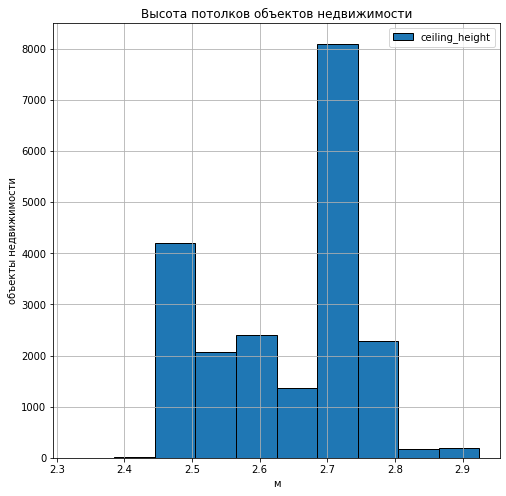

In [759]:
# Для того, чтобы построить гистограмму без выбросов 
# рассчитаем первый квартиль Q1, третий квартиль Q3 и межквартильный размах IQR. 
q1 = data['ceiling_height'].quantile(.25)
q3 = data['ceiling_height'].quantile(.75)
iqr = q3 - q1

# Построим гистограмму
data['ceiling_height'].hist(bins=10, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), ec='black', figsize=(8, 8), legend=True)
plt.title('Высота потолков объектов недвижимости')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Без выбросов диапазон до 2.9 м. Большая часть объектов недвижимости имеет высоту потолков 2.65 - 2.7 м. Потолки более 2.8 м и менее 2.5 м встречается редко. Среднее значение 2.7 м, медиана 2.7 м.

Этаж квартиры:

In [760]:
data['floor'].describe()

count    23539.000000
mean         5.869068
std          4.846810
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

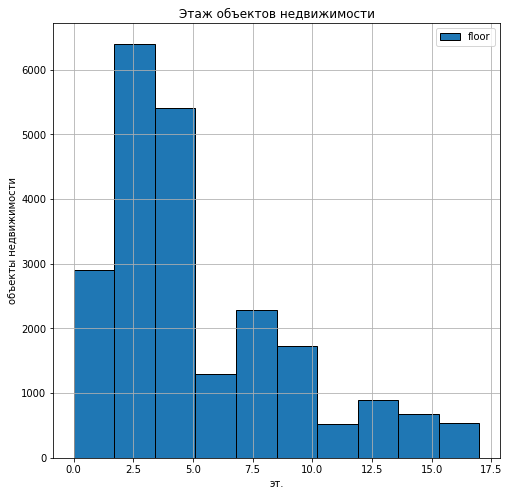

In [761]:
# Для того, чтобы построить гистограмму без выбросов 
# рассчитаем первый квартиль Q1, третий квартиль Q3 и межквартильный размах IQR. 
q1 = data['floor'].quantile(.25)
q3 = data['floor'].quantile(.75)
iqr = q3 - q1

# Построим гистограмму
data['floor'].hist(bins=10, range=(0, (q3 + 1.5 * iqr)), ec='black', figsize=(8, 8), legend=True)
plt.title('Этаж объектов недвижимости')
plt.xlabel('эт.')
plt.ylabel('объекты недвижимости')
plt.show()

Без выбросов диапазон до 16 этажей. Большая часть объектов недвижимости имеет 1-9 этаж. Наиболее распространенный вариант 2-4 этаж. Среднее значение 6, медиана 5.

Тип этажа квартиры («первый», «последний», «другой»):

In [762]:
data['floor_category'].describe()

count      23539
unique         3
top       другой
freq       17317
Name: floor_category, dtype: object

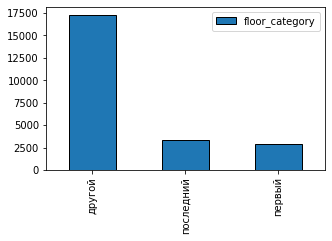

In [763]:
# Отобразим это на графике количесество по категориям
data['floor_category'].value_counts().plot.bar(figsize=(5, 3), ec='black', legend=True)
plt.show()

Объекты недвижимости, расположенные на первом и последним этажах имеют примерно одинаковые небольшие значения. В основном объекты недвижимости расположены между первым и последним этажами.

Общее количество этажей в доме:

In [764]:
data['floors_total'].describe()

count    23454.000000
mean        10.626460
std          6.520177
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

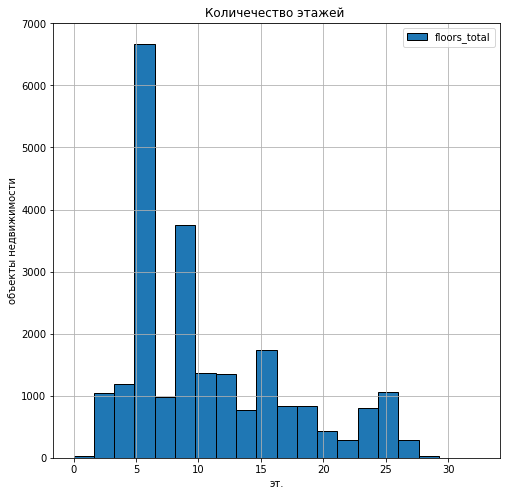

In [765]:
# Для того, чтобы построить гистограмму без выбросов 
# рассчитаем первый квартиль Q1, третий квартиль Q3 и межквартильный размах IQR. 
q1 = data['floors_total'].quantile(.25)
q3 = data['floors_total'].quantile(.75)
iqr = q3 - q1

# Построим гистограмму
data['floors_total'].hist(bins=20, range=(0, (q3 + 1.5 * iqr)), ec='black', figsize=(8, 8), legend=True)
plt.title('Количечество этажей ')
plt.xlabel('эт.')
plt.ylabel('объекты недвижимости')
plt.show()

Без выбросов диапазон до 27 этажей. Большая часть домов имеет от 5 до 17 этажей. Наиболее распространенные варианты 5 и 9 этажей. Среднее значение 11, медиана 9.

Расстояние до центра города в метрах:

In [766]:
data['city_centers_nearest'].describe()

count    23539.000000
mean     13974.112664
std       7600.168545
min        181.000000
25%      10927.000000
50%      13101.000000
75%      15292.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

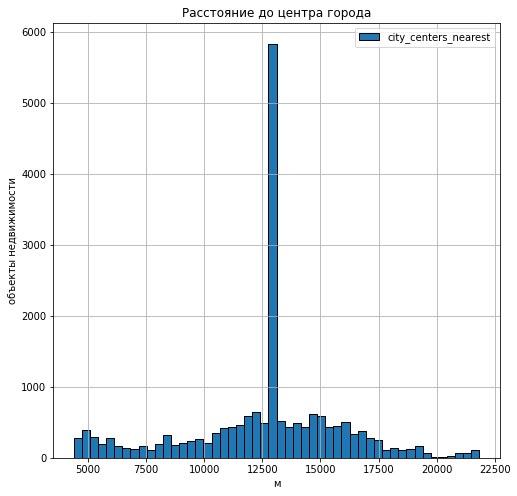

In [767]:
# Для того, чтобы построить гистограмму без выбросов 
# рассчитаем первый квартиль Q1, третий квартиль Q3 и межквартильный размах IQR. 
q1 = data['city_centers_nearest'].quantile(.25)
q3 = data['city_centers_nearest'].quantile(.75)
iqr = q3 - q1

# Построим гистограмму
data['city_centers_nearest'].hist(bins=50, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), ec='black', figsize=(8, 8), legend=True)
plt.title('Расстояние до центра города')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Без выбросов диапазон до 27 тыс. м. Большая часть объектов недвижимости находится на расстоянии от 3 до 17 тыс. м. от центра. Наиболее распространенные варианы 12-15 тыс. м. Среднее значение 14 тыс. м, медиана 13 тыс. м.

Расстояние до ближайшего аэропорта:

In [768]:
data['airports_nearest'].describe()

count    18038.000000
mean     28827.728739
std      12638.456962
min       6450.000000
25%      18573.000000
50%      26773.000000
75%      37324.250000
max      84869.000000
Name: airports_nearest, dtype: float64

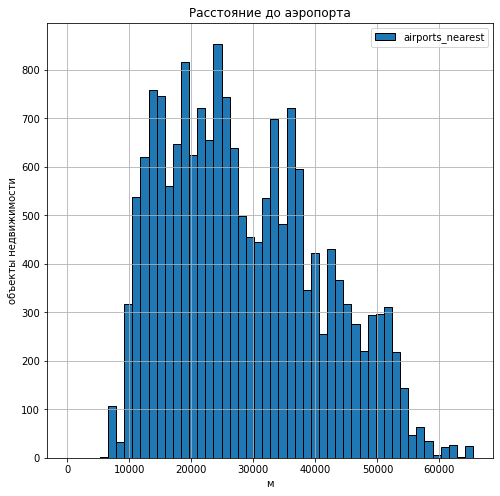

In [769]:
# Для того, чтобы построить гистограмму без выбросов 
# рассчитаем первый квартиль Q1, третий квартиль Q3 и межквартильный размах IQR. 
q1 = data['airports_nearest'].quantile(.25)
q3 = data['airports_nearest'].quantile(.75)
iqr = q3 - q1

# Построим гистограмму
data['airports_nearest'].hist(bins=50, range=(0, (q3 + 1.5 * iqr)), ec='black', figsize=(8, 8), legend=True)
plt.title('Расстояние до аэропорта')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Без выбросов диапазон до 65 тыс. м. Большая часть объектов недвижимости находится на расстоянии от 10 до 40 тыс. м. от аэропорта. Наиболее распространенный вариант 24 тыс. м. Среднее значение 28.8 тыс. м, медиана 26.8 тыс. м.

Расстояние до ближайшего парка:

In [770]:
data['parks_nearest'].describe()

count    8040.000000
mean      490.688682
std       342.811553
min         1.000000
25%       287.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

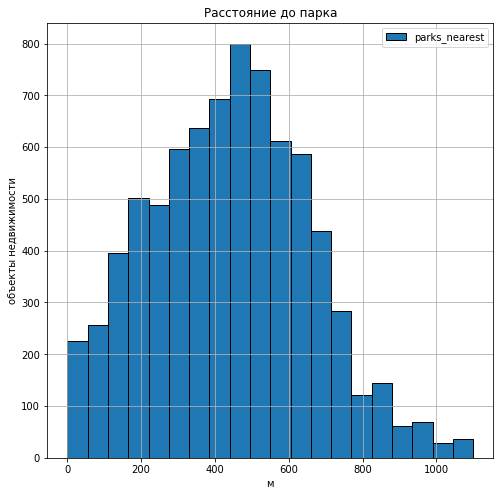

In [771]:
# Для того, чтобы построить гистограмму без выбросов 
# рассчитаем первый квартиль Q1, третий квартиль Q3 и межквартильный размах IQR. 
q1 = data['parks_nearest'].quantile(.25)
q3 = data['parks_nearest'].quantile(.75)
iqr = q3 - q1

# Построим гистограмму
data['parks_nearest'].hist(bins=20, range=(0, (q3 + 1.5 * iqr)), ec='black', figsize=(8, 8), legend=True)
plt.title('Расстояние до парка')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Без выбросов диапазон до 1100 м. Большая часть объектов недвижимости находится на расстоянии от 100 до 700 м. от парка. Наиболее распространенные варианы 400-500 м. Среднее значение 490 м, медиана 450 м.

День и месяц публикации объявления:

День недели:

In [772]:
data['week_day_exposition'].describe()

count    23539.000000
mean         2.567101
std          1.789438
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: week_day_exposition, dtype: float64

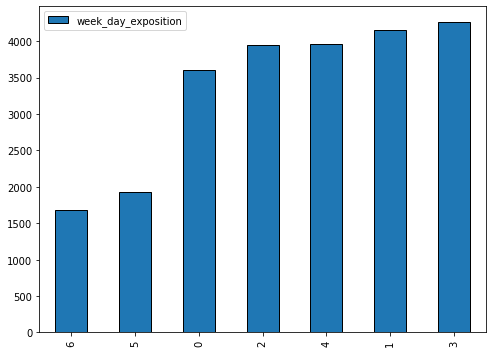

In [773]:
# Отобразим на графике количество объявлений по каждому дню недели
data['week_day_exposition'].value_counts().sort_values().plot.bar(figsize=(8, 6), ec='black', legend=True)
plt.show()

Можно заметить, что чаще всего объявления публиковали во вторник и четверг. В выходные дни редко публиковали объявления.

Месяц публикации:

In [774]:
data['month_exposition'].describe()

count    23539.000000
mean         6.396066
std          3.490251
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

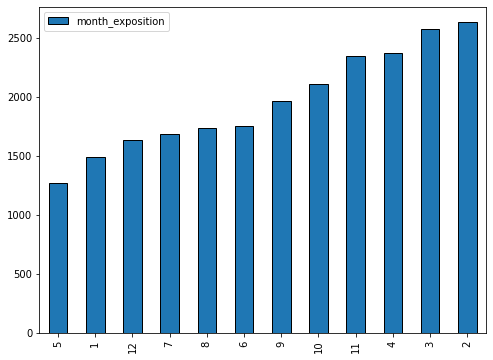

In [775]:
# Отобразим на графике количество объявлений по каждому месяцу
data['month_exposition'].value_counts().sort_values().plot.bar(figsize=(8, 6), ec='black', legend=True)
plt.show()

Можно заметить, что чаще всего объявления публиковали в марте и феврале Вероятно, что из-за большого количества выходных и праздничных дней наименьшие количество публикаций в январе и мае. 

__*На основе изучения параметров объектов можно сформированить описание типичного объекта недвижимости:*__

* квартира стоимостью около 4.2 млн.руб,
* с 1 или 2 комнатами, 
* общей площадью 40-45 м²,
* жилой площадью 18 м²,
* площадью кухни около 6 м²,
* с высотой потолков 2,65-2.7 м,
* на 2-4 этажах,
* в 5-ти или 9-ти этажном доме,
* расположенной на расстоянии от центра города 12000-15000 метров,
* от аэропорта на расстоянии 24000 м,
* до ближайшего парка 400-500 метров.

__*2.	Изучим, как быстро продавались квартиры.*__

Построим гистограмму.

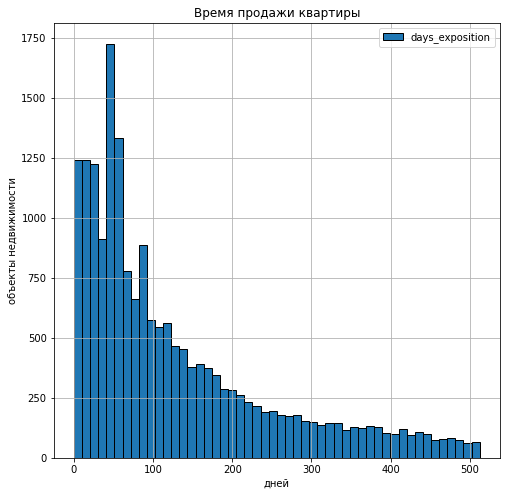

In [776]:
# Для того, чтобы построить гистограмму без выбросов 
# рассчитаем первый квартиль Q1, третий квартиль Q3 и межквартильный размах IQR. 
q1 = data['days_exposition'].quantile(.25)
q3 = data['days_exposition'].quantile(.75)
iqr = q3 - q1

# Построим гистограмму
data['days_exposition'].hist(bins=50, range=(0, (q3 + 1.5 * iqr)), ec='black', figsize=(8, 8), legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дней')
plt.ylabel('объекты недвижимости')
plt.show()

На графике видны пики около 50-60 дней. Выбросы лежат за границей 510 дней. Посмотрим более подробно интревал до 100 дней.

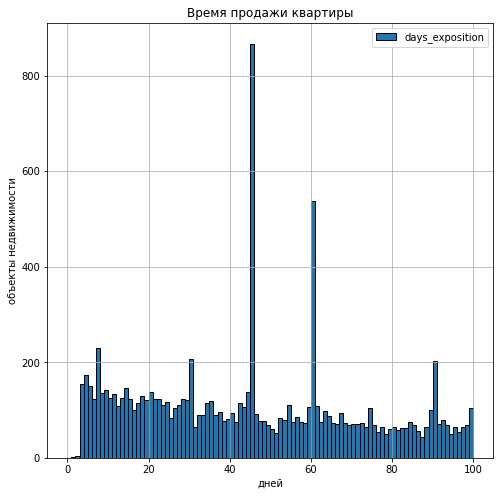

In [777]:
data['days_exposition'].hist(bins=100, range=(0, 100), ec='black', figsize=(8, 8), legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дней')
plt.ylabel('объекты недвижимости')
plt.show()

Можно заметить, что чаще всего квартиры продают за 7, 30, 45, 60, 90 дней. Возможно это связано со снятием объктов с продажи по истечению сроков публикации на сервисе.

Посчитаем среднее и медиану.

In [778]:
data['days_exposition'].describe()

count    20368.000000
mean       181.052042
std        220.021053
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи объекта недвижимости почти 183 дня, медианное значение 96 дней. Максимальное значение - 1572 дня. Среднее значение в 2 раза больше медианного. Стандартное отклонение превышает среднее значение, что говорит о большом количестве выбросов.

Уберем пиковые значения и посмотрим еще раз.

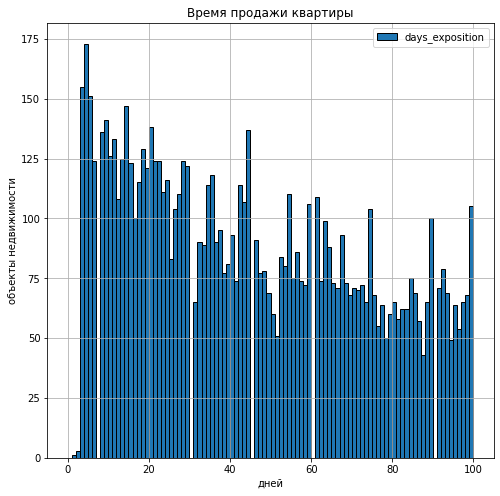

count    18325.000000
mean       195.930859
std        227.047432
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [779]:
# Сохраним очищенные данные в новый датафрейм clear_data
clear_data = data
clear_data['days_exposition'] = round(clear_data['days_exposition'])
clear_data = clear_data.query('days_exposition != 7 and days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90')

# новая гистограмма
clear_data['days_exposition'].hist(bins=100, range=(0, 100), ec='black', figsize=(8, 8), legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дней')
plt.ylabel('объекты недвижимости')
plt.show()

# новые среднее значение, медиана
clear_data['days_exposition'].describe()

__*Можно считать, что быстрая продажа расположена в 1 квартиле - до 43 дней. Нормальные продажи - 2 и 3 квартили - от 43 до 257 дней, долгая продажа - от 257 до 510 дней (см. первоначальную гистограмму без выбросов). Продажи более 510 дней являются аномалиями.*__

__*3.	Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта.*__

Подготовим необходимые данные и функции:

In [780]:
# Создадим пустой список для хранения козф. корреляции
# он будет нужен при дальнейшем анализе
k_corrs = []

# Создадим функции для расчета зависимостей
def create_dependence_scatter(index):
    try:
        # выводим коэф. корреляци
        k_corr = round(data[index].corr(data['last_price']), 2)
        print('Коэффициент корреляции Пирсона:', k_corr)
        # добавим коэф. корреляци в словарь
        k_corrs.append([index, k_corr])
        # создаем график зависимости
        data.plot(x=index, y='last_price', kind='scatter', figsize=(8, 6), legend=True, alpha=0.03)
        plt.title('Зависимость стоимости квартиры от ' + index)
        plt.xlabel(index)
        # для лучшей визуализации устанавливаем ограничение стоимости 100 млн. руб.
        plt.ylabel('стоимость, 100 млн.руб.')
        plt.ylim(0, 100000000)
        plt.show()
    except:
        pass
    
def create_dependence_bar(index, corr=1):
    try:
        if corr:
            # выводим коэф. корреляци
            k_corr = round(data[index].corr(data['last_price']), 2)
            print('Коэффициент корреляции Пирсона:', k_corr)
            # добавим коэф. корреляци в словарь
            k_corrs.append([index, k_corr])
        # создаем сводную таблицу
        pivot_table = data.pivot_table(index=index, values='last_price', aggfunc=['mean', 'count', 'median'])
        # присваиваем названия колонкам
        pivot_table.columns = ['mean', 'count', 'median']
        # выводим сводную таблицу
        display(pivot_table.head(12))
        # создаем график зависимости
        pivot_table.plot(y = 'median', kind='bar', legend=True)
        plt.title('Зависимость стоимости квартиры от ' + index)
        plt.xlabel(index)
        plt.ylabel('стоимость')
        plt.show()
    except:
        pass

__*Зависимость стоимости от общей площади:*__

Коэффициент корреляции Пирсона: 0.65


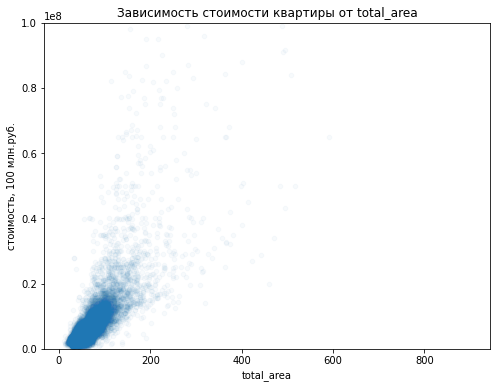

In [781]:
# построим зависимость от total_area
create_dependence_scatter('total_area')

Коэффициент корреляции достаточно велик. Зависимость прямопропорциональная - чем больше площадь квартиры, тем выше ее стоимость.

Коэффициент корреляции Пирсона: 0.56


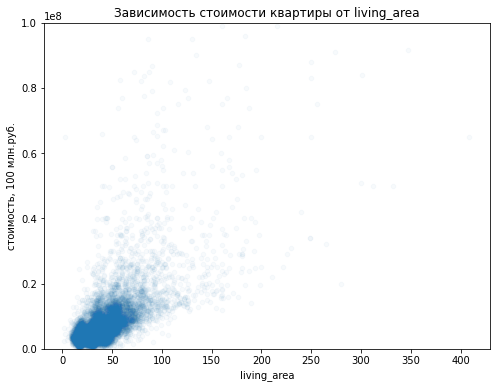

In [782]:
# построим зависимость от living_area
create_dependence_scatter('living_area')

Коэффициент корреляции достаточно велик. Зависимость прямопропорциональная - чем больше жилая площадь квартиры, тем выше ее стоимость.

__*Зависимость стоимости от площади кухни:*__

Коэффициент корреляции Пирсона: 0.52


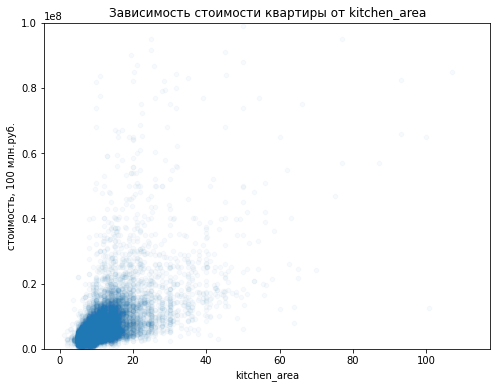

In [783]:
# построим зависимость от kitchen_area
create_dependence_scatter('kitchen_area')

Коэффициент корреляции достаточно велик. Зависимость прямопропорциональная - чем больше площадь кухни квартиры, тем выше ее стоимость.

__*Зависимость стоимости от количества комнат:*__

Коэффициент корреляции Пирсона: 0.36


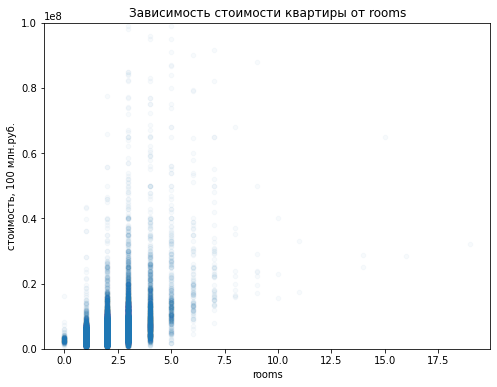

In [784]:
# построим зависимость от rooms
create_dependence_scatter('rooms')

Коэффициент корреляции небольшой. Стоимость растет в зависимости от числа комнат от 1 до 4. Далее стоимость снижается. Возможно, что у 5-ти комнатных квартир меньшая площадь (например, влияют старые дома).

Зависимость стоимости от этажа, на котором расположена квартира (первый, последний, другой):

,mean,count,median
floor_category,,,
другой,6.680643e+06,17317,4850000
первый,4.804932e+06,2906,3900000
последний,7.265215e+06,3316,4300000


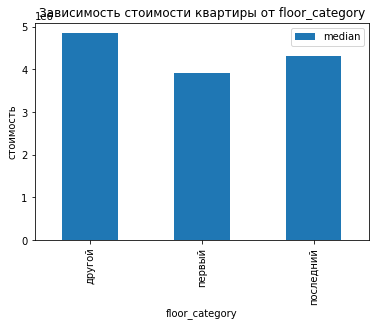

In [785]:
# построим зависимость от floor_category
create_dependence_bar('floor_category', corr=0)

Самая низкая стоимость у кварти на 1-м этаже. Последние этажи стоят чуть меньше чем средние.

Зависимость стоимости от даты размещения (день недели, месяц, год):

,mean,count,median
week_day_exposition,,,
0,6.484674e+06,3597,4650000
1,6.401253e+06,4159,4750000
2,6.624137e+06,3947,4700000
3,6.683354e+06,4265,4650000
4,6.344875e+06,3961,4590000
5,6.996055e+06,1925,4600000
6,6.258556e+06,1685,4550000


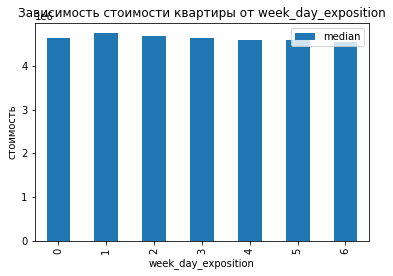

In [786]:
# построим зависимость от week_day_exposition
create_dependence_bar('week_day_exposition', corr=0)

,mean,count,median
month_exposition,,,
1,6.637288e+06,1486,4600000
2,6.474824e+06,2628,4650000
3,6.371722e+06,2573,4670000
4,6.743938e+06,2366,4800000
5,6.594847e+06,1268,4500000
6,6.279216e+06,1751,4400000
7,6.530639e+06,1686,4625000
8,6.362909e+06,1735,4590000
9,6.856359e+06,1961,4700000


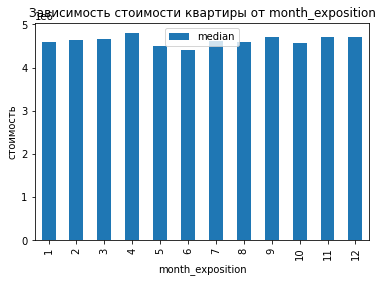

In [787]:
# построим зависимость от month_exposition
create_dependence_bar('month_exposition', corr=0)

,mean,count,median
year_exposition,,,
2014,1.204660e+07,136,7640000
2015,8.507233e+06,1168,5312500
2016,6.833448e+06,2759,4550000
2017,6.592491e+06,8120,4500000
2018,5.929275e+06,8485,4550000
2019,6.783032e+06,2871,5050000


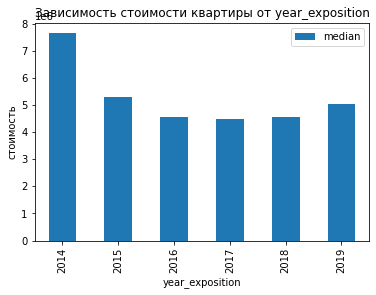

In [788]:
# построим зависимость от year_exposition
create_dependence_bar('year_exposition', corr=0)

Зависимоть между датой размещения объявления (день недели, месяц, год) и стоимостью квартир отсутствует. 

Выведем и сравним все рассчитанные коэффициенты корреляции:

In [789]:
pd.DataFrame(data=k_corrs, columns=['parameter', 'k_corr'])

,parameter,k_corr
0,total_area,0.65
1,living_area,0.56
2,kitchen_area,0.52
3,rooms,0.36


__*Таким образом, можно отметить, что наибольшая положительная корреляция между общей площадью квартиры и ее стоимостью. Чем больше общая площадь квартиы, тем выше ее стоимость.*__ 

Также положительная корреляция присутствует между жилой площадью, площадью кухни квартиры и ее стоимостью. Менее сильная положительная корреляция между количеством комнат квартиры и ее стоимостью. На первых и последних этажах стоимость квартиры меньше, чем на средних. Между днем недели, месяцем, годом размещения объявления и стоимостью квартиры зависимость отсутствует.

__*4.	Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.*__

Выберем 10 населенных пунктов с наибольшим числом объявлений:

In [790]:
max_localities = data['locality_name'].value_counts().head(10)
max_localities

Санкт-Петербург      15648
посёлок Мурино         583
деревня Кудрово        460
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      324
Гатчина                307
Выборг                 237
Name: locality_name, dtype: int64

Рассчитаем среднюю цену в рублях за м² по этим населенным пунктам:

In [791]:
mean_price = round(data.query('locality_name in @max_localities.index').pivot_table(index='locality_name', values='one_meter_price'))
mean_price.sort_values(by='one_meter_price', ascending=False)

,one_meter_price
locality_name,
Санкт-Петербург,114738.0
Пушкин,103126.0
деревня Кудрово,95299.0
посёлок Парголово,90191.0
посёлок Мурино,85925.0
посёлок Шушары,78677.0
Колпино,75425.0
Гатчина,68746.0
Всеволожск,68654.0


Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра:

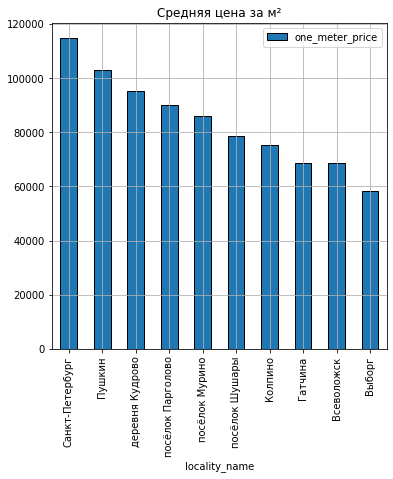

In [792]:
# для наглядности построим график
mean_price.sort_values(by='one_meter_price', ascending=False).plot(kind='bar', legend=True, grid=True, ec='black', figsize=(6, 6))

plt.title('Средняя цена за м²')
plt.show()

__*Максимальная средняя цена за 1 м² в Санкт-Петербурге - 114738 руб. Далее следуют Пушкин и пр. Наименьшая цена за квадратный метр в Выборге - 58142 руб.*__

__*5.	Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.*__

Сформируем датафрейм только для Санкт-Петербурга:

In [793]:
spb_data = data.query('locality_name == "Санкт-Петербург"')
# проверим результат 
display(spb_data.head(10))
# выведем информацию о датафрейме
spb_data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,locality_short_name,one_meter_price,week_day_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,Санкт-Петербург,120370.0,3,3,2019,другой,16.0
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,2.0,574.0,558.0,Санкт-Петербург,92786.0,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,...,3.0,234.0,424.0,Санкт-Петербург,408176.0,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,Санкт-Петербург,100000.0,1,6,2018,другой,8.0
7,5,7915000,71.6,2019-04-18,2,2.70,24.0,NaN,22,False,...,0.0,NaN,NaN,Санкт-Петербург,110545.0,3,4,2019,другой,12.0
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,0.0,NaN,289.0,Санкт-Петербург,88525.0,6,2,2017,другой,15.0
10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,2.0,553.0,137.0,Санкт-Петербург,127525.0,3,11,2017,другой,14.0
15,16,4650000,39.0,2017-11-18,1,2.70,14.0,20.5,5,False,...,1.0,296.0,19.0,Санкт-Петербург,119231.0,5,11,2017,другой,14.0
16,11,6700000,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,...,0.0,NaN,397.0,Санкт-Петербург,81707.0,3,11,2017,первый,11.0
17,6,4180000,36.0,2016-09-09,1,2.70,17.0,16.5,7,False,...,1.0,859.0,571.0,Санкт-Петербург,116111.0,4,9,2016,другой,15.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15648 entries, 0 to 23697
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             15648 non-null  int32         
 1   last_price               15648 non-null  int32         
 2   total_area               15648 non-null  float64       
 3   first_day_exposition     15648 non-null  datetime64[ns]
 4   rooms                    15648 non-null  int32         
 5   ceiling_height           15648 non-null  float64       
 6   floors_total             15578 non-null  float64       
 7   living_area              14513 non-null  float64       
 8   floor                    15648 non-null  int64         
 9   is_apartment             15648 non-null  bool          
 10  is_studio                15648 non-null  bool          
 11  is_open_plan             15648 non-null  bool          
 12  kitchen_area             14303 n

Опишем, как стоимость объектов зависит от расстояния до центра города.

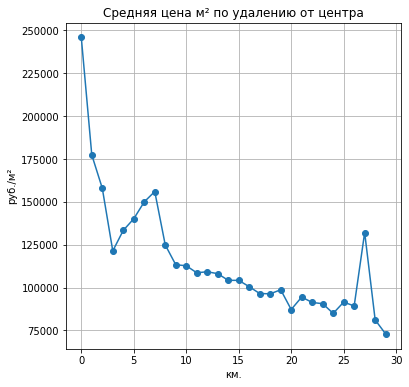

In [794]:
# сформируем сводную таблицу 
spb_pivot_table = spb_data.pivot_table(index='city_centers_nearest_km', values='one_meter_price')
# выведем график
spb_pivot_table.plot(marker='o', grid=True, figsize=(6, 6), legend=False)
plt.title('Средняя цена м² по удалению от центра')
plt.xlabel('км.')
plt.ylabel('руб./м²')
plt.show()

Можно отметить, что максимальная стоимость м² непосредственно в радиусе 1 км. от центра города. На удалении свыше 8 км. от центра возникает отрицательная линейная зависимость стоимости м² от расстояния. Пики в районах 7 и 27 км возможно возникают из-за наличия элитного жилья.

**Промежуточные выводы:**

* изучены и описаны следующие параметры:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления
* построены гистограммы для каждого параметра
* на основе изучения параметров объектов сформировано описание типичного объекта недвижимости:
  - квартира стоимостью около 4.2 млн.руб,
  - с 1 или 2 комнатами,
  - общей площадью 40-45 м²,
  - жилой площадью 18 м²,
  - площадью кухни около 6 м²,
  - с высотой потолков 2,65-2.7 м,
  - на 2-4 этажах,
  - в 5-ти или 9-ти этажном доме,
  - расположенной на расстоянии от центра города 12000-15000 метров,
  - от аэропорта на расстоянии 24000 м,
  - до ближайшего парка 400-500 метров.
* изучено, как быстро продавались квартиры.
  - построены гистограммы,
  - рассчитаны среднее и медианы,
  - определено, что быстрая продажа - до 43 дней. Нормальные продажи - от 43 до 257 дней, долгая продажа - от 257 до 510 дней (см. первоначальную гистограмму без выбросов). Продажи более 510 дней являются аномалиями.
* изучено, какие факторы больше всего влияют на общую (полную) стоимость объекта. Построены графики, которые показывают зависимость цены от указанных ниже параметров:
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);
  - определено, что наибольшая положительная корреляция между общей площадью квартиры и ее стоимостью. Чем больше общая площадь квартиы, тем выше ее стоимость. Также положительная корреляция присутствует между жилой площадью, площадью кухни квартиры и ее стоимостью. Менее сильная положительная корреляция между количеством комнат квартиры и ее стоимостью. На первых и последних этажах стоимость квартиры меньше, чем на средних. Между днем недели, месяцем, годом размещения объявления и стоимостью квартиры зависимость отсутствует.
* рассчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Определены населённые пункты с самой высокой и низкой стоимостью квадратного метра:
    - Максимальная средняя цена за 1 м² в Санкт-Петербурге - 114738 руб. Далее следуют Пушкин и пр. Наименьшая цена за квадратный метр в Выборге - 58142 руб.
* рассчитаны в Санкт-Петербурге  средние цены каждого километра. Определено, как стоимость объектов зависит от расстояния до центра города:
    - максимальная стоимость м² непосредственно в радиусе 1 км. от центра города. На удалении свыше 8 км. от центра возникает отрицательная линейная зависимость стоимости м² от расстояния. Пики в районах 7 и 27 км возможно возникают из-за наличия элитного жилья.

## Общий вывод

**Результаты и основной вывод проведённого исследования:**

__*1. На основе изучения параметров объектов сформировано описание типичного объекта недвижимости:*__
  - квартира стоимостью около 4.2 млн.руб,
  - с 1 или 2 комнатами,
  - общей площадью 40-45 м²,
  - жилой площадью 18 м²,
  - площадью кухни около 6 м²,
  - с высотой потолков 2,65-2.7 м,
  - на 2-4 этажах,
  - в 5-ти или 9-ти этажном доме,
  - расположенной на расстоянии от центра города 12000-15000 метров,
  - от аэропорта на расстоянии 24000 м,
  - до ближайшего парка 400-500 метров.

__*2. Определено, что быстрая продажа - до 43 дней. Нормальные продажи - от 43 до 257 дней, долгая продажа - от 257 до 510 дней.*__

__*3. Определено, что наибольшая положительная корреляция между общей площадью квартиры и ее стоимостью. Чем больше общая площадь квартиы, тем выше ее стоимость.*__ Также положительная корреляция присутствует между жилой площадью, площадью кухни квартиры и ее стоимостью. Менее сильная положительная корреляция между количеством комнат квартиры и ее стоимостью. На первых и последних этажах стоимость квартиры меньше, чем на средних. Между днем недели, месяцем, годом размещения объявления и стоимостью квартиры зависимость отсутствует.

__*4. Максимальная средняя цена за 1 м² в Санкт-Петербурге - 114738 руб. Далее следуют Пушкин и пр. Наименьшая цена за квадратный метр в Выборге - 58142 руб.*__

__*5. Для Санкт-Петербурга определено, что максимальная стоимость м² непосредственно в радиусе 1 км. от центра города. На удалении свыше 8 км. от центра возникает отрицательная линейная зависимость стоимости м² от расстояния.*__ Пики в районах 7 и 27 км возможно возникают из-за наличия элитного жилья.


__*Рекомендации ответственным за выгрузку данных из сервиса Яндекс Недвижимость:*__
* изменить тип данных в столбцах:
    - `last_price` float64 в int32 (цена в рублях),
    - `first_day_exposition` object в datetime (дата),
    - `floors_total` float64 в int32 (число этажей),
    - `is_apartment object` в bool (булев тип),
    - `balcony` float64 в int32 (число балконов),
    - `parks_around3000` float64 в int32 (число парков),
    - `ponds_around3000` float64 в int32 (число водоемов),
    - `days_exposition` float64 в int32 (число дней).
* устранить пропуски:
    - `ceiling_height`,
    - `floors_total`,
    - `is_apartment`,
    - `living_area`,
    - `kitchen_area`,
    - `balcony`,
    - `locality_name`,
    - `airports_nearest`,
    - `cityCenters_nearest`,
    - `parks_around3000`,
    - `parks_nearest`,
    - `ponds_around3000`,
    - `ponds_nearest`,
    - `days_exposition`,
* скорректировать данные в столбцах:
    - `last_price` Min цена квартиры 12190 руб.
    - `rooms` Min число комнат 0.
    - `ceiling_height` Min высота потолков 1 метр, max - 100 метров. 
    - `floors_total` Max количество этажей 60.
    - `airports_nearest` Min расстояние до аэропорта 0 м.
* привести названия столбцов `cityCenters_nearest`, `studio`, `open_plan`, `parks_around3000`, `ponds_around3000` к регистру "snake_case".

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод